<h1 style="text-align: center;"><strong>ENCS5341 Assignment 1 Solution</strong></h1>

<h2 style="text-align: left;"><strong>Student Name:</strong> Nidal Zabade</h2>
<h2 style="text-align: left;"><strong>Student ID:</strong> 1200153</h2>


In this assignment, we will perform essential data preprocessing steps on `cars.csv` dataset. The dataset contains information about cars.


### 1- Read the dataset and examine how many features and examples does it have?


#### Importing the required libraries


In [991]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the dataset


In [992]:
df = pd.read_csv("cars.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


#### To check the number of features and examples in the dataset we use the `shape` attribute of the dataframe. also, we can use the `info()` method to get more information about the dataset.


In [993]:
df.shape

(398, 8)

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


#### **The dataset has 8 features and 398 examples**


### 2- Are there features with missing values? How many missing values are there in each one?


#### To calculate the number of missing values in each feature we use the `isnull()` method to get a boolean mask of the dataframe and then use the `sum()` method to calculate the number of `True` values in each feature.


In [995]:
nullValues = df.isnull().sum()
nullValues

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

#### We can see that the features `horsepower` and `origin` have missing values. The feature `horsepower` has 6 missing values and the feature `origin` has 2 missing values.


### 3- Fill the missing values in each feature using a proper imputation method (mean, median, mode)


#### In the feature `horsepower` we will use the mean to fill the missing values because it a numerical feature. and In the feature `origin` we will use the mode to fill the missing values because it is a categorical feature.


In [996]:
df["horsepower"].fillna(df["horsepower"].mean(), inplace=True)

In [997]:
df["origin"].fillna(df["origin"].mode()[0], inplace=True)

In [998]:
nullValuesAfter = df.isnull().sum()
nullValuesAfter

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### 4- Which country produces cars with better fuel economy? (plot the `mpg` for each country)


<Axes: xlabel='origin', ylabel='mpg'>

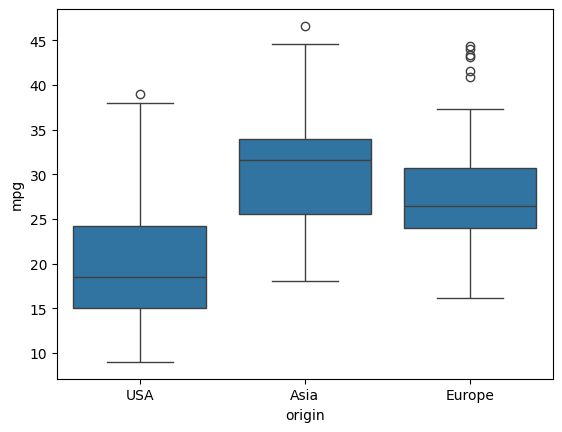

In [999]:
sns.boxplot(x="origin", y="mpg", data=df)

#### As we can see from the plot, the country that produces cars with better fuel economy is Asia. We can also see that the country that produces cars with the worst fuel economy is the USA. (We can get the same result by using the `groupby()` method)


### 5- Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’?


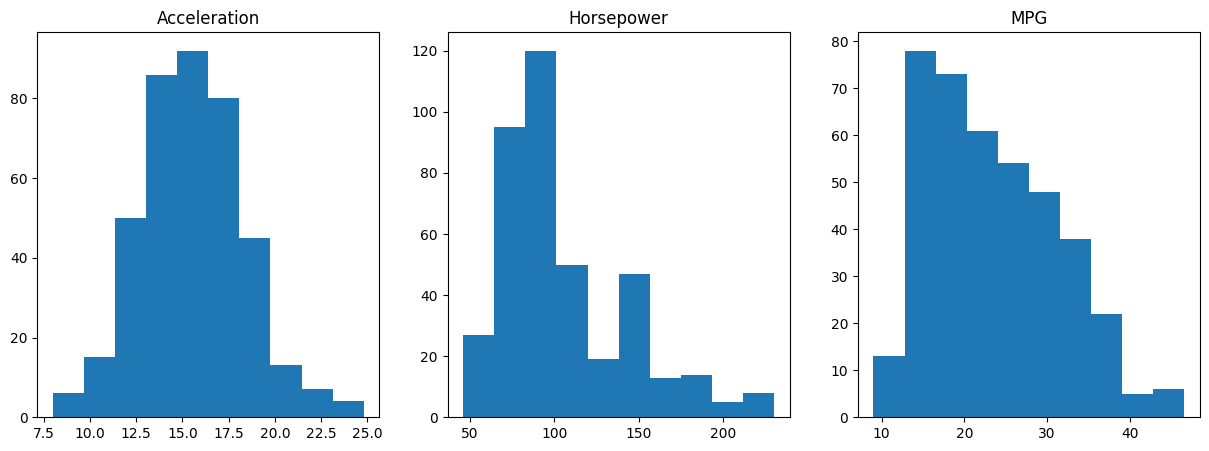

In [1000]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df["acceleration"])
plt.title("Acceleration")

plt.subplot(1, 3, 2)
plt.hist(df["horsepower"])
plt.title("Horsepower")

plt.subplot(1, 3, 3)
plt.hist(df["mpg"])
plt.title("MPG")

plt.show()

#### As we can see from the plots, the feature `Acceleration` has a distribution that is most similar to a Gaussian.


### 6- Support your answer for part 5 by using a quantitative measure.


In [1001]:
measures = ["skewness", "mean", "median"]
columns = ["acceleration", "horsepower", "mpg"]
data = []
for i in columns:
    data.append([df[i].skew(), df[i].mean(), df[i].median()])
measures_df = pd.DataFrame(data, columns=measures, index=columns)
measures_df

,skewness,mean,median
acceleration,0.278777,15.568090,15.5
horsepower,1.095552,104.469388,95.0
mpg,0.457066,23.514573,23.0


#### To support my answer i used the `skew()` method to calculate the skewness of each feature. The skewness of a normal distribution is zero. A distribution with a skewness of zero is called a normal distribution. A distribution with a skewness less than zero is called a negative skewness. A distribution with a skewness greater than zero is called a positive skewness. As we can see from the results, the feature `Acceleration` has a skewness of -0.02 which is the closest to zero. Also i supported my answer by using the `mean()` and `median()` methods to calculate the mean and median of each feature. As we can see from the results, the feature `Acceleration` has a mean of 15.5 and a median of 15.5 which are the closest to each other. Therefore, the feature `Acceleration` has a distribution that is most similar to a Gaussian.


### 7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?


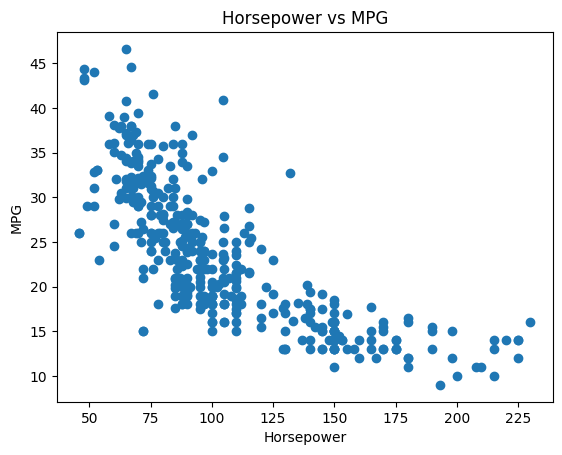

In [1002]:
plt.scatter(df["horsepower"], df["mpg"])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
plt.show()

In [1003]:
corr = df["horsepower"].corr(df["mpg"])
corr

-0.7714371350025521

#### As we can see from the plot, there is a negative correlation between the features `horsepower` and `mpg`. because when the value of the feature `horsepower` increases the value of the feature `mpg` decreases. To support my answer i used the `corr()` method to calculate the correlation between the features `horsepower` and `mpg`. As we can see from the results, the correlation between the features `horsepower` and `mpg` is -0.78 which is a negative correlation.


### 8- Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7. (Hint: This is a simple linear regression problem (one feature). Do not forget to add x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)


In [1004]:
X = df["horsepower"].values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X), X))
XT = X.transpose()
Y = df["mpg"].values.reshape(-1, 1)
XXT = np.matmul(XT, X)
XXT_inv = np.linalg.inv(XXT)
XTY = np.matmul(XT, Y)
beta = np.matmul(XXT_inv, XTY)
beta

array([[40.00451552],
       [-0.15784473]])

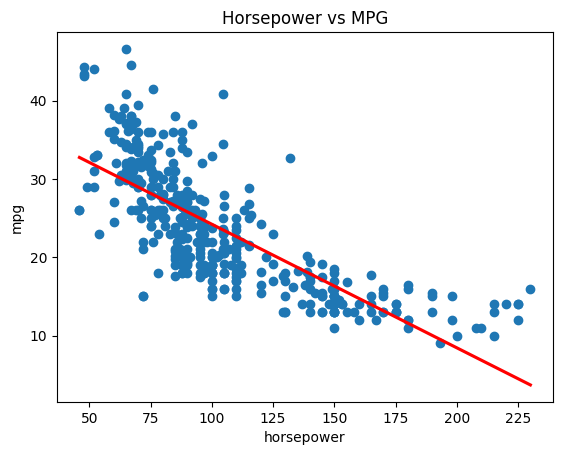

In [1005]:
plt.scatter(df["horsepower"], df["mpg"])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Horsepower vs MPG")
sns.regplot(x="horsepower", y="mpg", data=df, ci=None, scatter=False, color="red")
plt.show()

### 9- Repeat part 8 but now learn a quadratic function of the form f(x)=w0+w1x+w2x2.


In [1006]:
X = df["horsepower"].values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X), X, X**2))
XT = X.transpose()
Y = df["mpg"].values.reshape(-1, 1)
XXT = np.matmul(XT, X)
XXT_inv = np.linalg.inv(XXT)
XTY = np.matmul(XT, Y)
beta = np.matmul(XXT_inv, XTY)
beta

array([[ 5.64035222e+01],
       [-4.55434972e-01],
       [ 1.18761665e-03]])

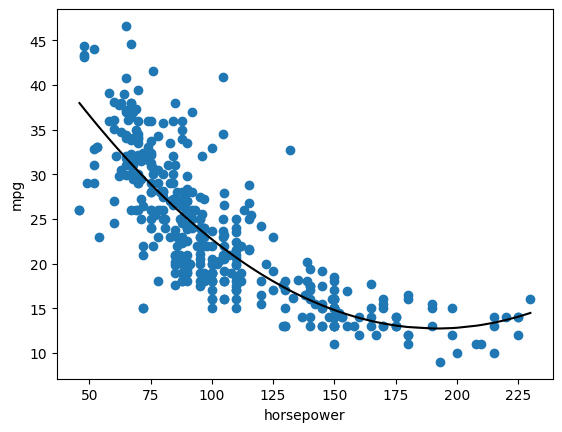

In [1007]:
line = beta[0] + beta[1] * df["horsepower"] + beta[2] * df["horsepower"] ** 2

plt.scatter(x=df["horsepower"], y=df["mpg"])
sns.lineplot(x=df["horsepower"], y=line, color="black")
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

### 10- Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.


In [1008]:
X = df["horsepower"].values
Y = df["mpg"].values

e = 666666
alpha = 0.00005
beta0 = 0.0
beta1 = 0.0
n = X.shape[0]

for i in range(e):
    y_pred = beta0 + beta1 * X
    error = Y - y_pred
    grad1 = (-2 / n) * X.dot(error)
    grad0 = (-2 / n) * sum(error)
    beta0 = beta0 - alpha * grad0
    beta1 = beta1 - alpha * grad1

beta0, beta1

(39.98883344315105, -0.15771228416096952)

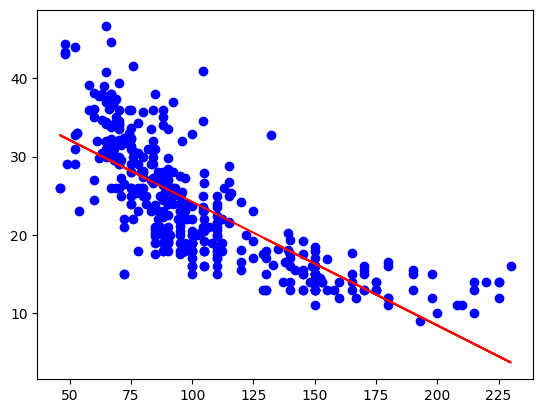

In [1009]:
plt.scatter(df["horsepower"], df["mpg"], color="blue", label="Data")
plt.plot(
    df["horsepower"],
    beta0 + beta1 * df["horsepower"],
    color="red",
    label="Regression Line",
)